In [1]:
import os
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

In [2]:
import shutil
import os

src = "kaggle.json"
dst = os.path.expanduser("~/.kaggle/kaggle.json")
shutil.copy(src, dst)

'C:\\Users\\vasan/.kaggle/kaggle.json'

In [3]:
!pip install kaggle

In [4]:
!kaggle datasets download safurahajiheidari/kidney-stone-images

Dataset URL: https://www.kaggle.com/datasets/safurahajiheidari/kidney-stone-images
License(s): other
kidney-stone-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import os
os.makedirs('D:/YOLOV8 Model/content', exist_ok=True)

In [6]:
import zipfile
zip_ref = zipfile.ZipFile('D:/YOLOV8 Model/kidney-stone-images.zip')
zip_ref.extractall('D:/YOLOV8 Model/content')
zip_ref.close()

In [7]:
DATADIR = 'D:/YOLOV8 Model/content'
CATEGORIES = ['TestImages', 'TrainImages', 'ValidImages']

<>:6: SyntaxWarning: invalid escape sequence '\Y'
<>:6: SyntaxWarning: invalid escape sequence '\Y'
C:\Users\vasan\AppData\Local\Temp\ipykernel_26680\2571072325.py:6: SyntaxWarning: invalid escape sequence '\Y'
  DATADIR = 'D:\YOLOV8 Model\content\KidneyDisease'


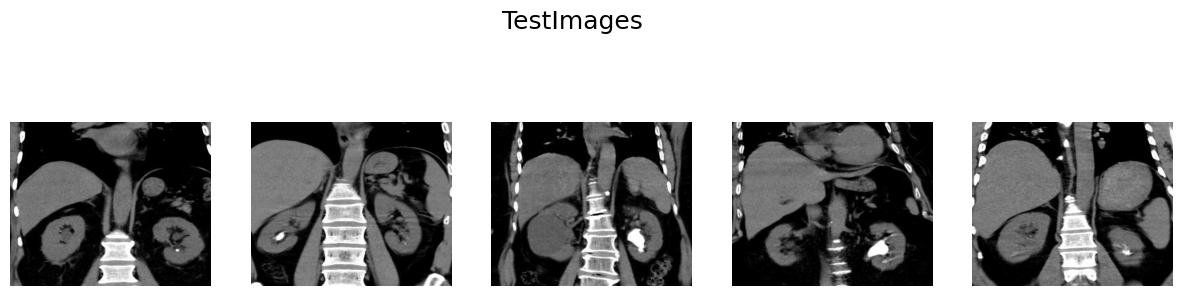

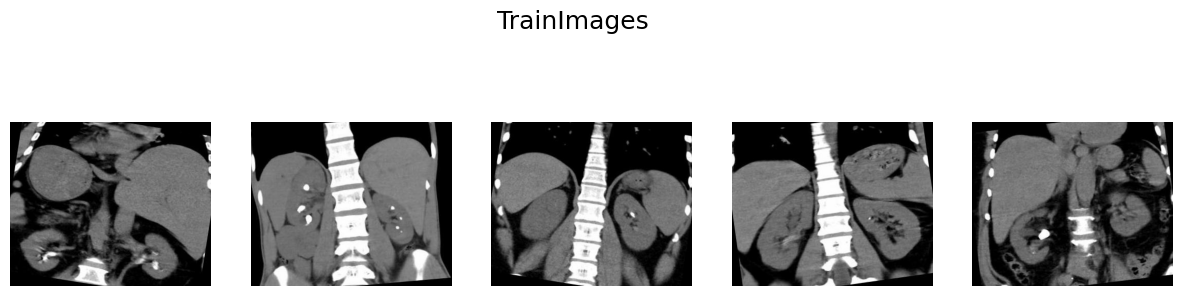

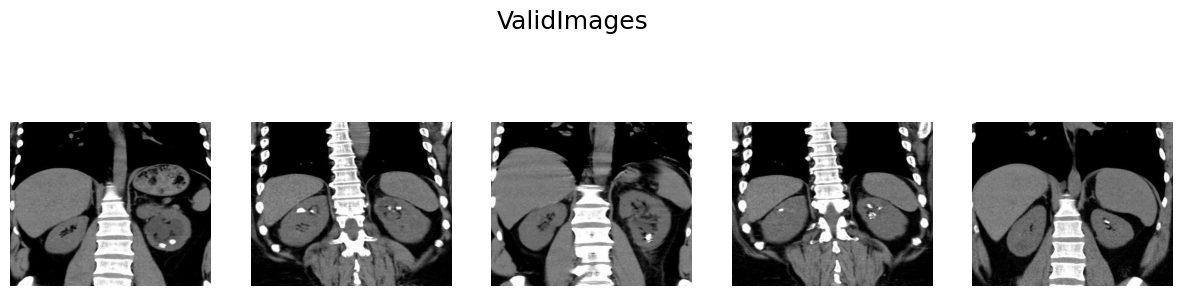

In [8]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

DATADIR = 'D:\YOLOV8 Model\content\KidneyDisease'
CATEGORIES  = ['TestImages','TrainImages','ValidImages']

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    images = os.listdir(path)

    fig, axes = plt.subplots(1, 5, figsize=(15, 4))
    fig.suptitle(f'{category}', fontsize=18)

    for i in range(5):
        img_name = images[np.random.randint(0, len(images))]
        img_path = os.path.join(path, img_name)
        img_array = cv2.imread(img_path)

        axes[i].imshow(img_array)
        axes[i].axis('off')

    plt.show()

In [9]:
!pip install ultralytics

In [10]:
from ultralytics import YOLO

In [11]:
model = YOLO('yolov8n.pt')

In [12]:
import os

# Check if training images exist
train_image_dir = 'D:/YOLOV8 Model/content/KidneyDisease/TrainImages'
if os.path.exists(train_image_dir):
    print(f"Training images found: {len(os.listdir(train_image_dir))}")
else:
    print(f"Training images directory not found: {train_image_dir}")

# Check if validation images exist
val_image_dir = 'D:/YOLOV8 Model/content/KidneyDisease/ValidImages'
if os.path.exists(val_image_dir):
    print(f"Validation images found: {len(os.listdir(val_image_dir))}")
else:
    print(f"Validation images directory not found: {val_image_dir}")

Training images found: 1054
Validation images found: 123


In [14]:
import os

# Check if training images exist
train_image_dir = 'D:/YOLOV8 Model/content/KidneyDisease/TrainImages'
if os.path.exists(train_image_dir):
    print(f"Training images found: {len(os.listdir(train_image_dir))}")
else:
    print(f"Training images directory not found: {train_image_dir}")

# Check if validation images exist
val_image_dir = 'D:/YOLOV8 Model/content/KidneyDisease/ValidImages'
if os.path.exists(val_image_dir):
    print(f"Validation images found: {len(os.listdir(val_image_dir))}")
else:
    print(f"Validation images directory not found: {val_image_dir}")

Training images found: 1054
Validation images found: 123


In [15]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # Use 'yolov8s.pt', 'yolov8m.pt', etc., for other sizes

# Train the model
results = model.train(data='/content/data.yaml', epochs=20, imgsz=640)

Ultralytics 8.3.188  Python-3.12.2 torch-2.8.0+cpu CPU (AMD Ryzen 5 5600H with Radeon Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train18, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretra

In [16]:
metrics = model.val()

Ultralytics 8.3.188  Python-3.12.2 torch-2.8.0+cpu CPU (AMD Ryzen 5 5600H with Radeon Graphics)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 64.27.3 MB/s, size: 17.3 KB)
val: Scanning D:\content\valid\labels.cache... 123 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 123/123 61350.9it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 0.72it/s 11.1s
                   all        123        325       0.75      0.662      0.706      0.301
Speed: 1.4ms preprocess, 79.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\detect\train182


In [17]:
metrics.confusion_matrix.plot()
plt.show()

In [18]:
import cv2
import matplotlib.pyplot as plt

In [19]:
model = YOLO('/content/yolov8n.pt')

In [30]:
image_path = 'D:/YOLOV8 Model/content/KidneyDisease/TestImages/1-3-46-670589-33-1-63742939456749458500001-4962227765358704856_png_jpg.rf.9e1bcdf85edc4c26b13e14e896cd7fae.jpg'

In [31]:
results = model(image_path)


image 1/1 D:\YOLOV8 Model\content\KidneyDisease\TestImages\1-3-46-670589-33-1-63742939456749458500001-4962227765358704856_png_jpg.rf.9e1bcdf85edc4c26b13e14e896cd7fae.jpg: 544x640 (no detections), 56.2ms
Speed: 2.6ms preprocess, 56.2ms inference, 0.6ms postprocess per image at shape (1, 3, 544, 640)


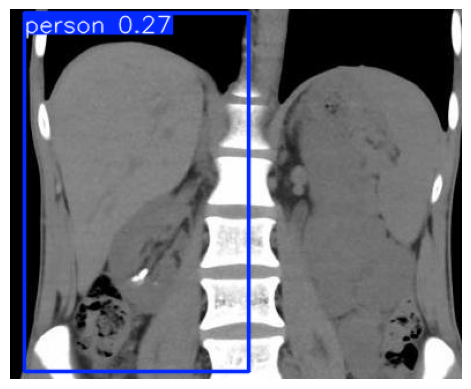

In [29]:
for result in results:
    annotated_image = result.plot()  # Draw bounding boxes on the image
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()